# The objective of this hands-on is to ensure that the development environment has been properly set up 

In [14]:
%matplotlib inline

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Load the required modules and libraries
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [17]:
# load dataset
dataraw = read_csv("heights_weights_genders.csv")
dataraw.sample(5)

,Height(cm),Weight(kg),Gender
3089,169.7,80.8,Male
8282,163.5,70.0,Female
9264,166.4,60.0,Female
5592,157.5,62.1,Female
2707,170.7,81.3,Male


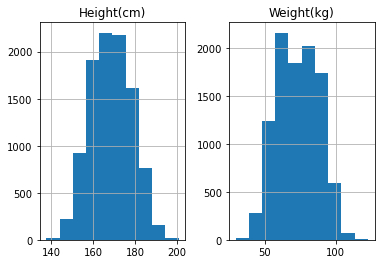

In [18]:
# Plot histograms
dataraw.hist()
plt.show()

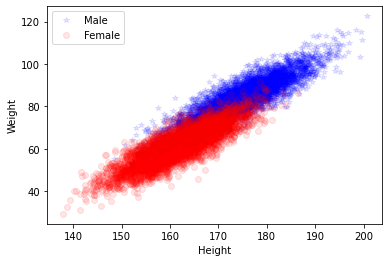

In [19]:
# Seperate the dataset into features (X) and label (y)
dataset = dataraw.values
X = dataset[:,:-1]
y = dataset[:,-1]

mpos = y == 'Male'
fpos = y == 'Female'
plt.plot(X[mpos, 0], X[mpos, 1], 'b*', alpha=0.1, label='Male')
plt.plot(X[fpos, 0], X[fpos, 1], 'ro', alpha=0.1, label='Female')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='best')
plt.show()

In [20]:
# split into input (X) and output (Y) variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train dimension: {X_train.shape}')
print(f'X_test dimension: {X_test.shape}')
print(f'y_train dimension: {y_train.shape}')
print(f'y_test dimension: {y_test.shape}')

X_train dimension: (8000, 2)
X_test dimension: (2000, 2)
y_train dimension: (8000,)
y_test dimension: (2000,)


In [21]:
# Scaling the features to the range between 0 and 1
print(f'Original minimum and maximum X_train: {X_train.min()}, {X_train.max()}')

scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
X2_train = scaler.fit_transform(X_train)
X2_test = scaler.transform(X_test)
print(f'Scaled minimum and maximum X_train: {X2_train.min()}, {X2_train.max()}')

Original minimum and maximum X_train: 29.3, 200.7
Scaled minimum and maximum X_train: 0.0, 1.0


In [22]:
# KNN classifier
knn = KNeighborsClassifier()
knn.fit(X2_train, y_train)
predictions = knn.predict(X2_test)
print(f'KNN accuracy: {100 * knn.score(X2_test, y_test):.3f}')

KNN accuracy: 91.450


In [23]:
# Make prediction based on user input
h = eval(input('Please enter height (cm): '))
w = eval(input('Please enter weight (kg): '))
q = scaler.transform(np.array([[h, w]]))

res1 = knn.predict(q)
print(f'kNN predicts: {res1}')

Please enter height (cm): 170
Please enter weight (kg): 75
kNN predicts: ['Female']
